In [3]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.ticker as ticker
from osgeo import gdal
import salem
from salem import *

In [4]:
fl_path = '/home/pelto/Desktop/ice_flux/Conrad/'
vdir ='img1_20160417__img1_20170521_vmap_5.0m_35px_spm2/'
vdir1 = '/home/pelto/Desktop/velocity_mapping/Conrad_DEMs/spm2/' + vdir
path = '/media/pelto/serac_backup/Lidar_DEMs/bare_earth_BC_hydro/conrad/'

In [5]:
def flux_gate_velocity(vdir, msk, gates):  #, gates, points)#, be_dem, snow_dem, msk):
    # open GeoTIFF as array
#    msk='conrad_2016_ice_msk_5m_glacieronly.tif'
    VX = vdir1 + vdir[:-1] + '-F_vx.tif' 
    VY = vdir1+ vdir[:-1] + '-F_vy.tif' 
    vx = salem.open_xr_dataset(VX)  #gdal.Open(vx).ReadAsArray()
    vy = salem.open_xr_dataset(VY)#gdal.Open(vy).ReadAsArray()
    msk = salem.open_xr_dataset(path+ msk) 
    msk = msk.to_array()
#     pts = salem.read_shapefile(fl_path+pts)
    gates = salem.read_shapefile(fl_path+gates)
#     msk[msk == 0.0] = 2.0
#     msk[msk == 1.0] = np.nan

    vx = vx.to_array()
    vy = vy.to_array()
    
    vx.data[msk.data==0] = np.nan
    vy.data[msk.data==0] = np.nan

    #     # map extent
    grid = mercator_grid(center_ll=(-116.94, 50.80), extent=(10000, 9000))
    #     grid = vx.salem.grid
    sm = Map(grid, countries=False)
    sm.set_lonlat_contours(interval=0)
    sm.set_scale_bar()
    sm.set_data(vx)
    #      Change the lon-lat countour setting
    sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
    
    
    shpf = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_all_glaciers_2014.shp'
    gdf = salem.read_shapefile(shpf)
    sm.set_shapefile(gdf, linewidth=1)
    sm.set_shapefile(gates, linewidth=1.5, color='r')
    sm.visualize()
    plt.show()

    fig, ax = plt.subplots()
    X = vx.x
    print(vx.x)
    Y = vy.y
    U = vx.data
    V = vy.data
    Q = ax.quiver(X, Y, U, V, units='xy', angles='uv')

    
    
    return vx

In [6]:
# velX = flux_gate_velocity(vdir, 'conrad_2016_ice_msk_5m_glacieronly.tif', 'conrad_flux_gates_17.shp')
# 'conrad_points_17gates.shp')

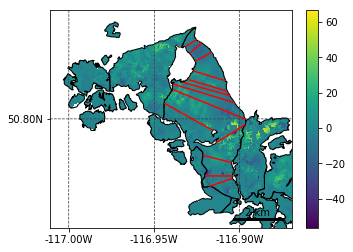

In [7]:
gates = 'conrad_flux_gates_17.shp'
msk='conrad_2016_ice_msk_5m_glacieronly.tif'



# open GeoTIFF as array
#    msk='conrad_2016_ice_msk_5m_glacieronly.tif'
VX = vdir1 + vdir[:-1] + '-F_vx.tif' 
VY = vdir1+ vdir[:-1] + '-F_vy.tif' 
vx = salem.open_xr_dataset(VX)  #gdal.Open(vx).ReadAsArray()
vy = salem.open_xr_dataset(VY)#gdal.Open(vy).ReadAsArray()
msk = salem.open_xr_dataset(path+ msk) 
msk = msk.to_array()
#     pts = salem.read_shapefile(fl_path+pts)
gates = salem.read_shapefile(fl_path+gates)
#     msk[msk == 0.0] = 2.0
#     msk[msk == 1.0] = np.nan

vx = vx.to_array()
vy = vy.to_array()

vx.data[msk.data==0] = np.nan
vy.data[msk.data==0] = np.nan

#     # map extent
grid = mercator_grid(center_ll=(-116.94, 50.80), extent=(10000, 9000))
#     grid = vx.salem.grid
sm = Map(grid, countries=False)
sm.set_lonlat_contours(interval=0)
sm.set_scale_bar()
sm.set_data(vx)
#      Change the lon-lat countour setting
sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')


shpf = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_all_glaciers_2014.shp'
gdf = salem.read_shapefile(shpf)
sm.set_shapefile(gdf, linewidth=1)
sm.set_shapefile(gates, linewidth=1.5, color='r')
sm.visualize()
plt.show()

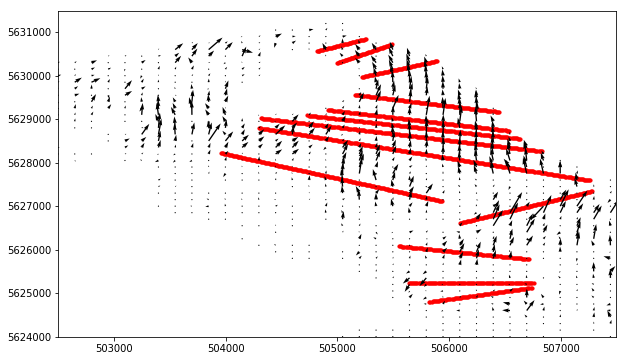

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,6))


df = salem.read_shapefile(fl_path + 'conrad_points_17gates.shp')

coords = np.array([p.xy for p in df.geometry]).squeeze()
df['E'] = coords[:, 0]
df['N'] = coords[:, 1]
# df['lon'] = df[4]
# df['lat'] = df[5]
ax.scatter(df.E, df.N, s=10, c='r' )#c='depth',cmap='viridis', s=10, ax=ax);


X, Y = np.meshgrid(vx.coords['x'],vx.coords['y'])
U = vx.data[0]
V = vy.data[0]

# Q = ax.quiver(X, Y, U, V)#units='width', angles='uv') 
Q = ax.quiver(X[::30, ::30], Y[::30, ::30], U[::30, ::30], V[::30, ::30], units='xy')
ax.set_xlim(502500, 507500)
ax.set_ylim( 5624000, 5631500)
#     plt.quiver(vx.x, vx.y, vx.data ,vy.data)
plt.savefig(fl_path+ 'products/'+ 'conrad_16_17_quiver.pdf', dpi=300)

In [ ]:
X, Y = np.meshgrid(vx.coords['x'],vx.coords['y'])
print(X, Y)

In [21]:
import math
vel_Z = np.sqrt((vx)**2 + vy**2 ) ## or should it be U and V ??
vel_Z_dir = math.cos


In [ ]:
vx.to_netcdf(fl_path + 'Conrad_16_17ss' + '_vx.nc')
vy.to_netcdf(fl_path + 'Conrad_16_17ss' + '_vy.nc')

In [ ]:
VX_nc = fl_path + 'Conrad_16_17ss' + '_vx.nc'
VX_nc = xr.open_dataset(VX_nc)
VX_nc

In [22]:
df = salem.read_shapefile(fl_path + 'conrad_points_17gates.shp')

In [30]:
df = salem.read_shapefile(fl_path + 'conrad_points_17gates.shp')

coords = np.array([p.xy for p in df.geometry]).squeeze()
df['E'] = coords[:, 0]
df['N'] = coords[:, 1]

In [31]:
df

,ID,ELEV,length,distance,angle,geometry,min_x,max_x,min_y,max_y,E,N
0,2,2160.0,782.252,10.0,61.368576,POINT (505223.6954030829 5629975.920264558),505223.695403,505223.695403,5.629976e+06,5.629976e+06,505223.695403,5.629976e+06
1,2,2160.0,782.252,20.0,61.368576,POINT (505232.4726061353 5629980.711997707),505232.472606,505232.472606,5.629981e+06,5.629981e+06,505232.472606,5.629981e+06
2,2,2160.0,782.252,30.0,61.368576,POINT (505241.2498091878 5629985.503730857),505241.249809,505241.249809,5.629986e+06,5.629986e+06,505241.249809,5.629986e+06
3,2,2160.0,782.252,40.0,61.368576,POINT (505250.0270122403 5629990.295464006),505250.027012,505250.027012,5.629990e+06,5.629990e+06,505250.027012,5.629990e+06
4,2,2160.0,782.252,50.0,61.368576,POINT (505258.8042152927 5629995.087197156),505258.804215,505258.804215,5.629995e+06,5.629995e+06,505258.804215,5.629995e+06
5,2,2160.0,782.252,60.0,61.368576,POINT (505267.5814183452 5629999.878930305),505267.581418,505267.581418,5.630000e+06,5.630000e+06,505267.581418,5.630000e+06
6,2,2160.0,782.252,70.0,61.368576,POINT (505276.3586213976 5630004.670663455),505276.358621,505276.358621,5.630005e+06,5.630005e+06,505276.358621,5.630005e+06
7,2,2160.0,782.252,80.0,61.368576,POINT (505285.1358244501 5630009.462396604),505285.135824,505285.135824,5.630009e+06,5.630009e+06,505285.135824,5.630009e+06
8,2,2160.0,782.252,90.0,61.368576,POINT (505293.9130275026 5630014.254129753),505293.913028,505293.913028,5.630014e+06,5.630014e+06,505293.913028,5.630014e+06
9,2,2160.0,782.252,100.0,61.368576,POINT (505302.690230555 5630019.045862903),505302.690231,505302.690231,5.630019e+06,5.630019e+06,505302.690231,5.630019e+06
